<a href="https://colab.research.google.com/github/GlazyevaValentina/Final_Project_GlazyevaVa/blob/main/output/new_first_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import os
from PIL import Image
import random
import tensorflow as tf
import keras
from matplotlib import pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose
from keras.layers import Activation, Dense, Dropout, Flatten

from keras.layers.normalization.batch_normalization import BatchNormalization
from keras.models import Sequential

from tensorflow.keras.utils import array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, rgb2gray, xyz2lab
from skimage.io import imsave

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Get images
image = img_to_array(load_img('/content/gdrive/MyDrive/My Diploma/Luda_Mayak.jpg'))
image = np.array(image, dtype=float)

In [ ]:
X = rgb2lab(1.0/255*image)[:,:,0]
Y = rgb2lab(1.0/255*image)[:,:,1:]
Y /= 128
X = X.reshape(1, 400, 400, 1)
Y = Y.reshape(1, 400, 400, 2)

In [ ]:
# Building the neural network
model = Sequential()
model.add(InputLayer(input_shape=(None, None, 1)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))

In [ ]:
# Finish model
model.compile(optimizer='rmsprop',loss='mse')

In [ ]:
model.fit(x=X, 
    y=Y,
    batch_size=1,
    epochs=500)

Epoch 1/500
1/1 [==============================] - 1s 739ms/step - loss: 0.0040
Epoch 2/500
1/1 [==============================] - 1s 684ms/step - loss: 0.0040
Epoch 3/500
1/1 [==============================] - 0s 410ms/step - loss: 0.0039
Epoch 4/500
1/1 [==============================] - 0s 383ms/step - loss: 0.0039
Epoch 5/500
1/1 [==============================] - 0s 425ms/step - loss: 0.0038
Epoch 6/500
1/1 [==============================] - 0s 414ms/step - loss: 0.0039
Epoch 7/500
1/1 [==============================] - 0s 409ms/step - loss: 0.0039
Epoch 8/500
1/1 [==============================] - 0s 403ms/step - loss: 0.0040
Epoch 9/500
1/1 [==============================] - 0s 410ms/step - loss: 0.0039
Epoch 10/500
1/1 [==============================] - 0s 411ms/step - loss: 0.0040
Epoch 11/500
1/1 [==============================] - 0s 398ms/step - loss: 0.0038
Epoch 12/500
1/1 [==============================] - 0s 413ms/step - loss: 0.0038
Epoch 13/500
1/1 [===================

In [ ]:
# Output colorizations
print(model.evaluate(X, Y, batch_size=1))
output = model.predict(X)
output *= 128
# Output colorizations
cur = np.zeros((400, 400, 3))
cur[:,:,0] = X[0][:,:,0]
cur[:,:,1:] = output[0]
imsave("/content/gdrive/MyDrive/My Diploma/img_result.png", lab2rgb(cur))
imsave("/content/gdrive/MyDrive/My Diploma/img_gray_version.png", rgb2gray(lab2rgb(cur)))

1/1 [==============================] - 0s 93ms/step - loss: 0.0023
0.002305195666849613
1/1 [==============================] - 0s 106ms/step


(-0.5, 399.5, 399.5, -0.5)

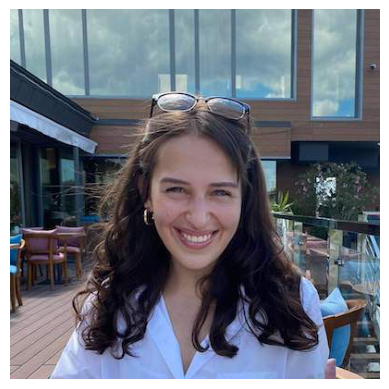

In [ ]:
image_r = Image.open("/content/gdrive/MyDrive/My Diploma/Luda_Mayak.jpg")
plt.imshow(image_r)
plt.axis('off')

(-0.5, 399.5, 399.5, -0.5)

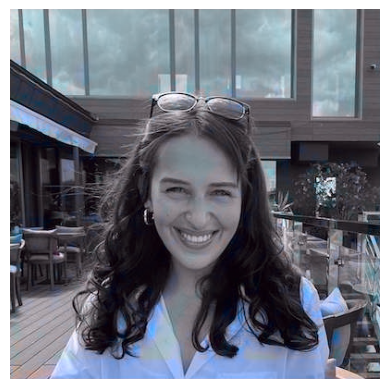

In [ ]:
image_g = Image.open("/content/gdrive/MyDrive/My Diploma/img_result.png")
plt.imshow(image_g)
plt.axis('off')

(-0.5, 399.5, 399.5, -0.5)

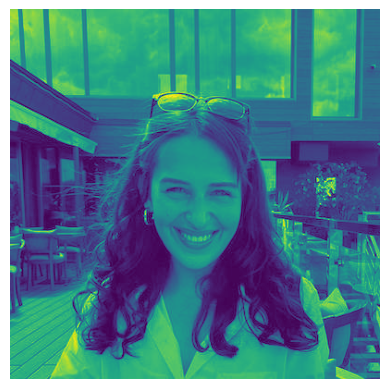

In [ ]:
image_r = Image.open("/content/gdrive/MyDrive/My Diploma/img_gray_version.png")
plt.imshow(image_r)
plt.axis('off')